# Prédiction du prix d'une voiture en fonction de ses caractéristiques

## Problèmatique

Le projet consiste à obtenir un modèle capable de prédire le prix d'une voiture en fonction de ses caractéristiques.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/imgowthamg/car-price<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()

## Analyse des données

In [2]:
w.clear_datasets()
w.add_dataset("cars", "/home/jeremy/Lab/repo/Portfolio-IA/Prediction/prix-voiture/resources/CarPrice_Assignment.csv", t="csv")
data = w.get_dataset("cars")

#### Structure du dataset

In [3]:
data.getCountRowColumns()

{'rows': 205, 'columns': 26}

<div class="alert alert-info" >On constate que le dataset est composé de <b>205</b> observations et de <b>26</b> variables
</div>

#### Types des variables

In [4]:
data.getTypesVariables(type="count")

object     10
int64       8
float64     8
Name: count, dtype: int64

In [5]:
data.getTypesVariables(type="all")

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

<div class="alert alert-info" >On constate que le dataset est composé de :<br />
    - <b>10</b> variables qualitatives <br />
    - <b>16</b> variables quantitatives
</div>

#### Les valeurs manquantes

In [6]:
data.getRatioMissingValues(show_heatmap=False)

,ratio,sum
car_ID,0.0,0
symboling,0.0,0
highwaympg,0.0,0
citympg,0.0,0
peakrpm,0.0,0
horsepower,0.0,0
compressionratio,0.0,0
stroke,0.0,0
boreratio,0.0,0
fuelsystem,0.0,0


<div class="alert alert-info" >On constate que le dataset ne comporte pas de valeur manquante.
</div>

#### Définitions des variables


- **car_ID** = Correspond à l'identifiant unique du véhicule<br />
- **symboling** = Correspond au niveau de risque d'assurance d'une voiture. 3 = Très risqué, -3 = Quasi aucun risque.<br />
- **CarName** = Correspond au nom du véhicule<br />
- **fueltype** = Correspond au type de carburant utilisé par le véhicule<br />
- **aspiration** = Correspond au type d'aspiration du véhicule<br />
- **doornumber** = Correspond au nombre de porte que possède le véhicule<br />
- **carbody** = Correspond au type de toit que possède la carrosserie de la voiture<br />
- **drivewheel** = Correspond au type de roue motrice du véhicule<br />
- **enginelocation** = Correspond à la position du moteur dans le véhicule<br />
- **wheelbase** = Correspond à l'empattement du véhicule<br />
- **carlength** = Correspond à la longueur du véhicule<br />
- **carwidth** = Correspond à la largeur du véhicule<br />
- **carheight** = Correspond à la hauteur du véhicule<br />
- **curbweight** = Correspond au poids à vide du véhicule<br />
- **enginetype** = Correspond au type de moteur<br />
- **cylindernumber** = Correspond au nombre de cyclindre du moteur de la voiture<br />
- **enginesize** = Correspond à la taille du moteur<br />
- **fuelsystem** = Correspond au systeme de carburant<br />
- **boreration** = Correspond au rapport d'alésage (largeur du cyclindre)<br />
- **stroke** = Correspond à la distance parcourue par le piston lors de chaque cycle.<br />
- **compressionratio** = Correspond au ratio de compression du piston<br />
- **horsepower** = Correspond à la puissance en cheaveaux<br />
- **peakrpm** = Correspond au régime en tours par minute<br />
- **citympg** = Correspond aux miles par gallon (mpg), est la distance en ville, mesurée en miles, qu'une voiture peut parcourir par gallon de carburant.<br />
- **highwaympg** = Correspond aux miles par gallon (mpg), est la distance sur autoroute, mesurée en miles, qu'une voiture peut parcourir par gallon de carburant.<br />
- **price** = Correspond au price de vente du véhicule.<br />
    <br />

#### Duplication des observations

In [7]:
data.getCountDuplicatedRows()

0

In [8]:
data.showDuplicatedRowByVariable(column=['car_ID'])

<b>Colonne : ['car_ID']</b>

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []




<div class="alert alert-info" >On constate que le dataset ne comporte pas de valeur dupliquée.
</div>

#### Nombre de valeur unique par variable

In [9]:
data.getUniqueValueByVariable()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

#### Description statistique

In [10]:
data.desc()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


#### Distribution des variables

In [11]:
variable_qualitatives = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
variable_quantitatives = ["car_ID","symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]


#### Récupération des modalités pour chaque variable qualitative

In [12]:
for col in variable_qualitatives:    
    print(f"Variable {col} : {data.df[col].unique()}")

Variable CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk'

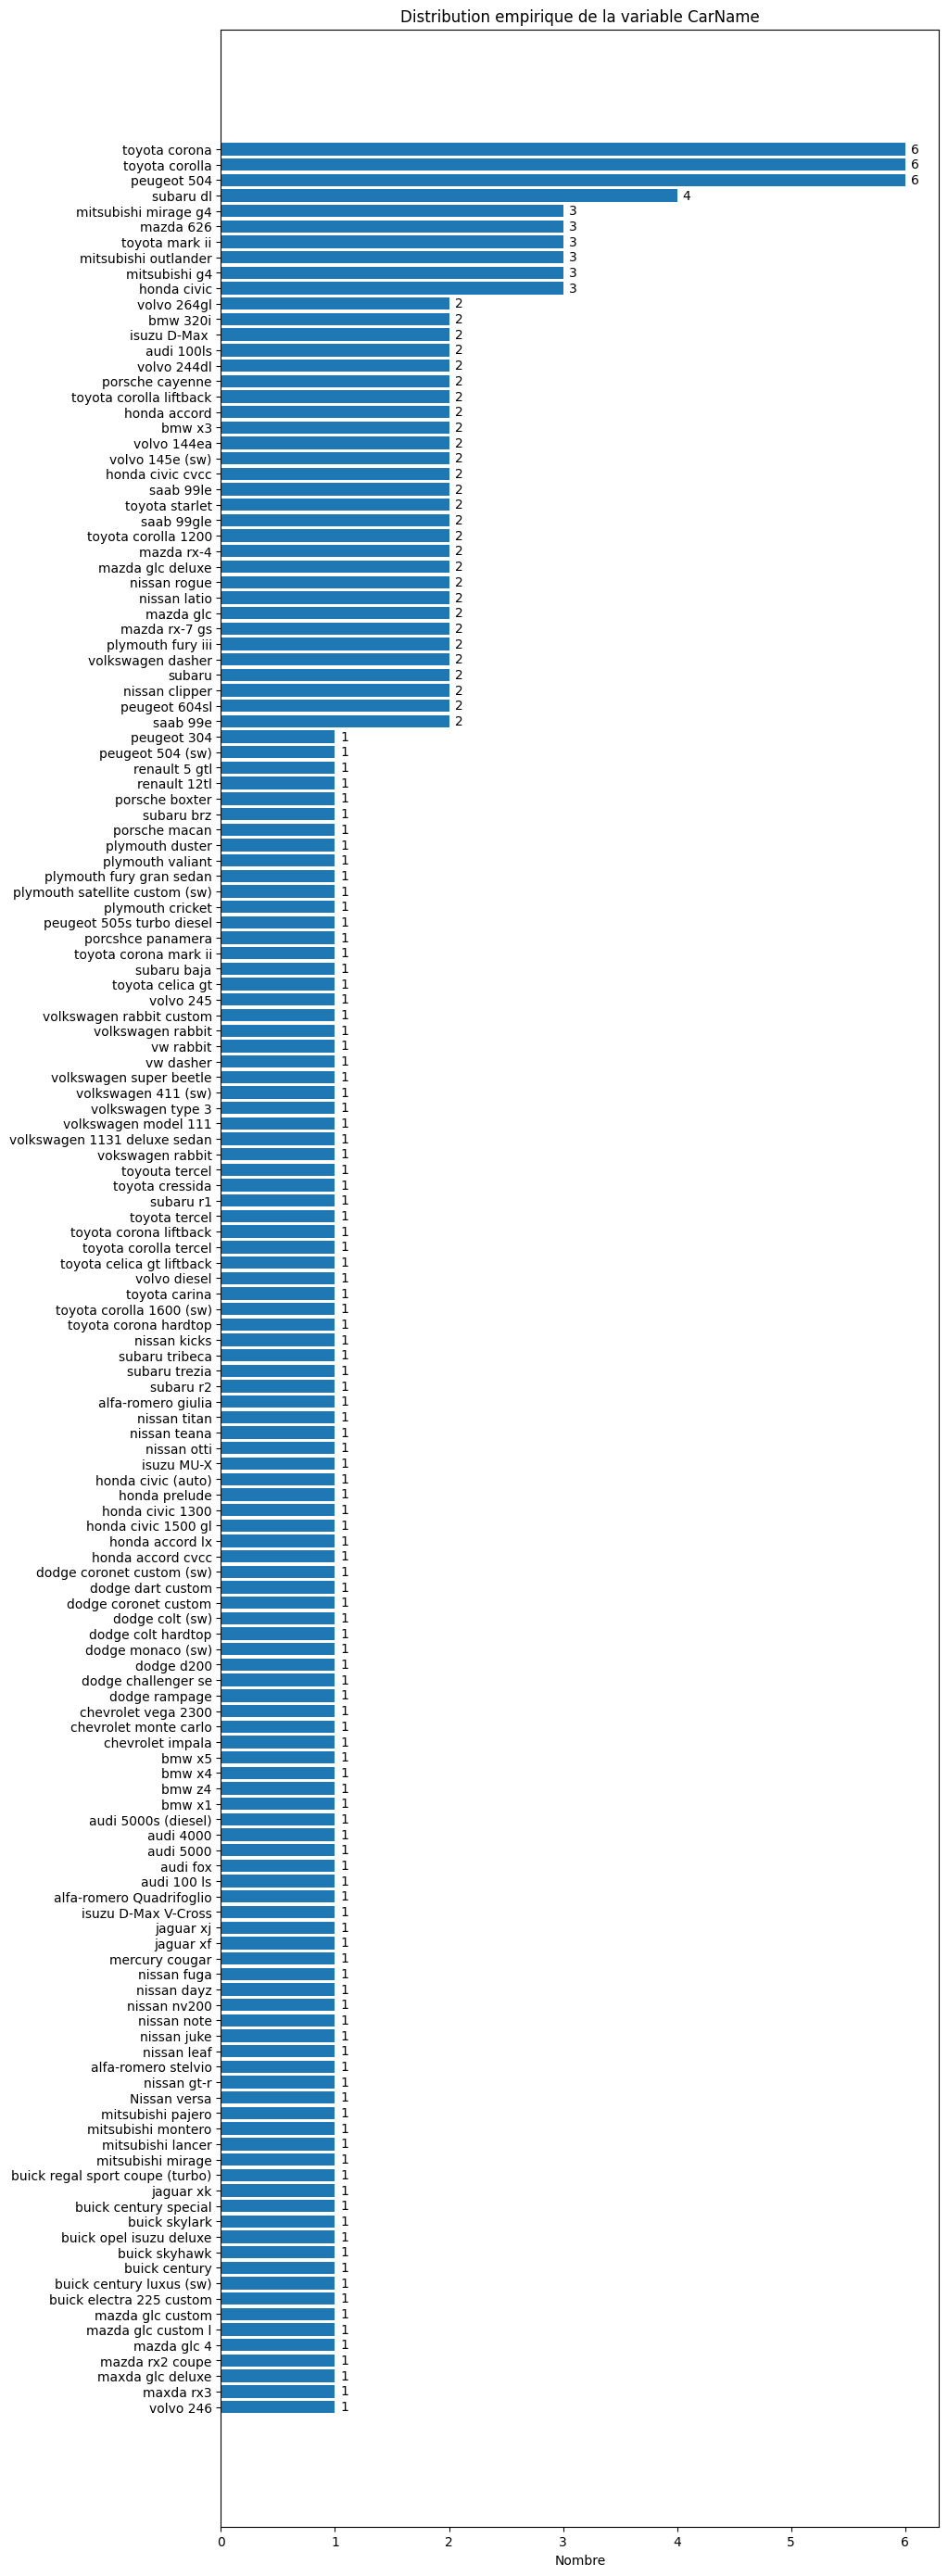

                  CarName  n         f         F
0           toyota corona  6  0.029268  0.029268
1          toyota corolla  6  0.029268  0.058537
2             peugeot 504  6  0.029268  0.087805
3               subaru dl  4  0.019512  0.107317
4    mitsubishi mirage g4  3  0.014634  0.121951
..                    ... ..       ...       ...
142           mazda glc 4  1  0.004878  0.980488
143       mazda rx2 coupe  1  0.004878  0.985366
144      maxda glc deluxe  1  0.004878  0.990244
145             maxda rx3  1  0.004878  0.995122
146             volvo 246  1  0.004878  1.000000

[147 rows x 4 columns]


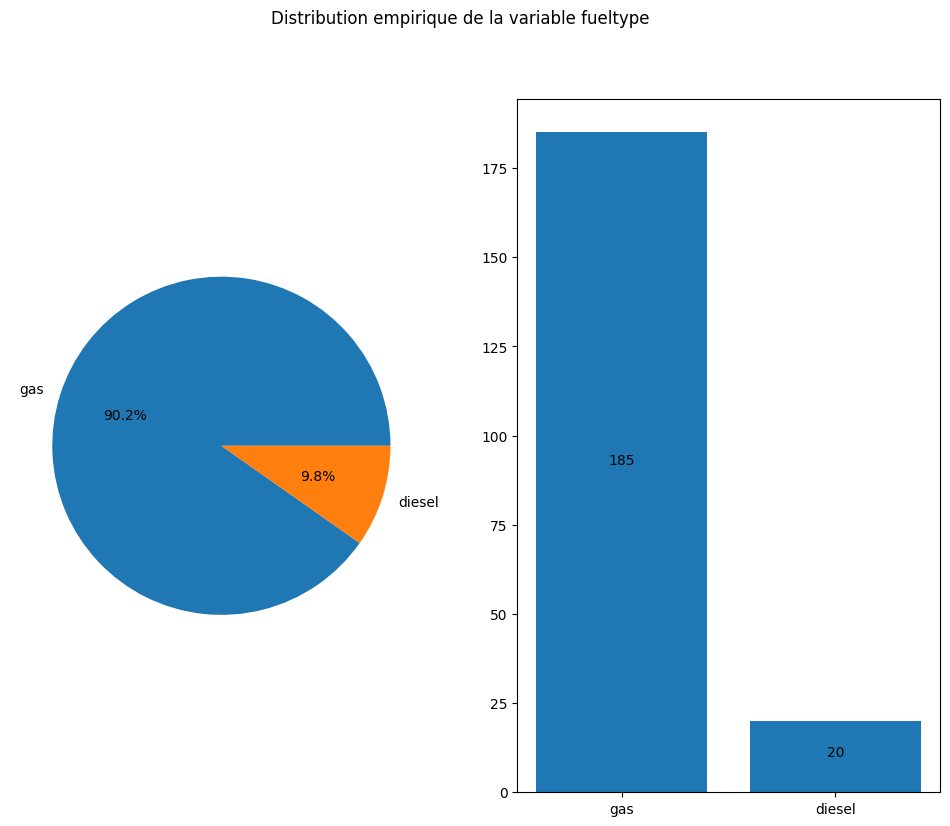

  fueltype    n         f         F
0      gas  185  0.902439  0.902439
1   diesel   20  0.097561  1.000000


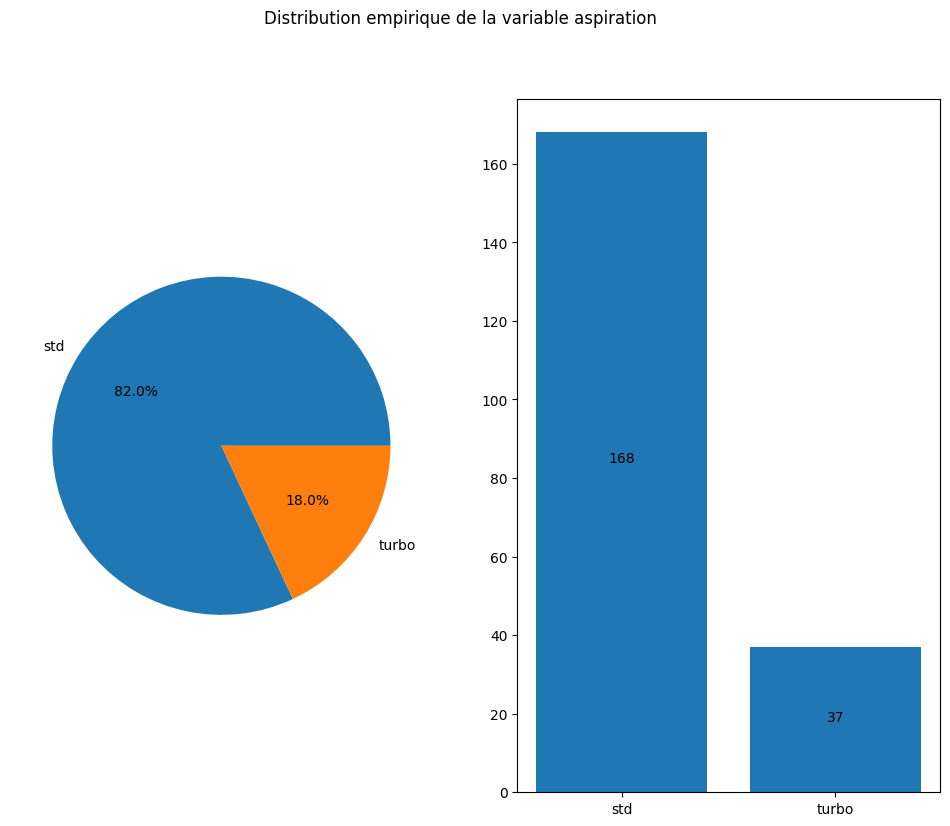

  aspiration    n         f         F
0        std  168  0.819512  0.819512
1      turbo   37  0.180488  1.000000


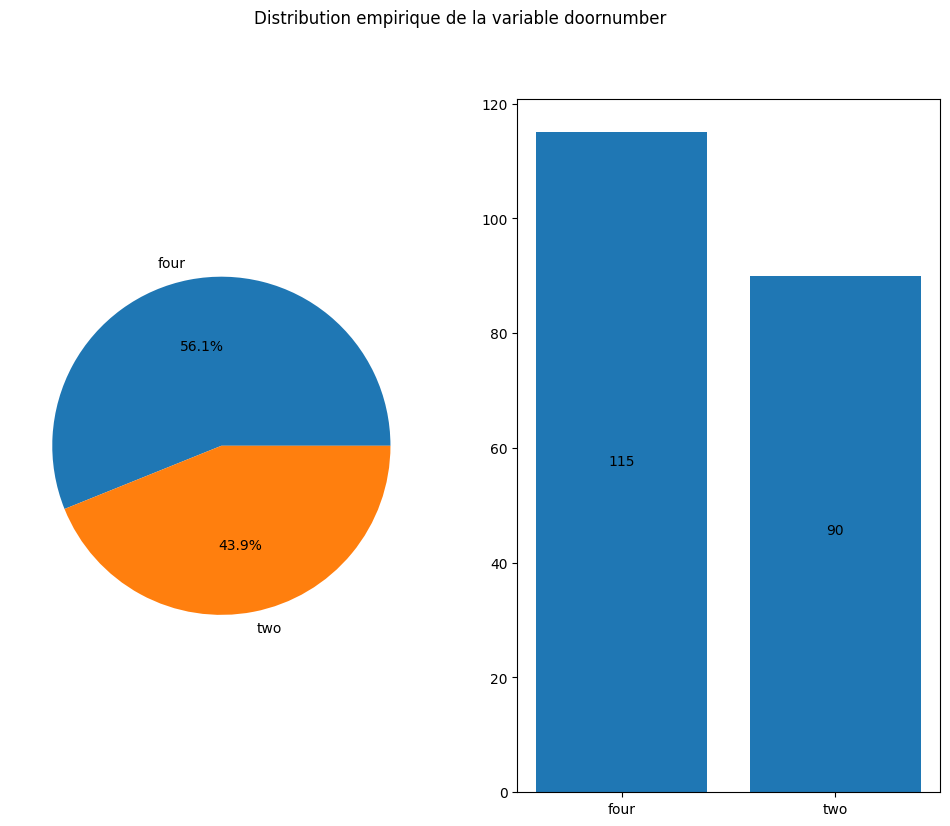

  doornumber    n         f         F
0       four  115  0.560976  0.560976
1        two   90  0.439024  1.000000


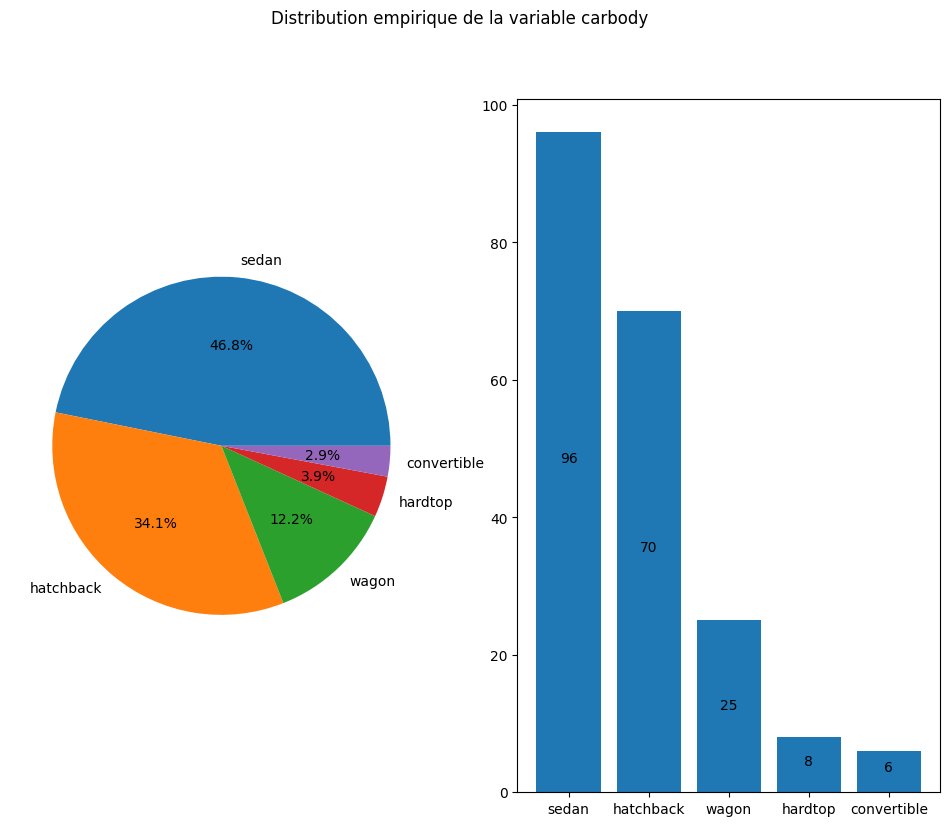

       carbody   n         f         F
0        sedan  96  0.468293  0.468293
1    hatchback  70  0.341463  0.809756
2        wagon  25  0.121951  0.931707
3      hardtop   8  0.039024  0.970732
4  convertible   6  0.029268  1.000000


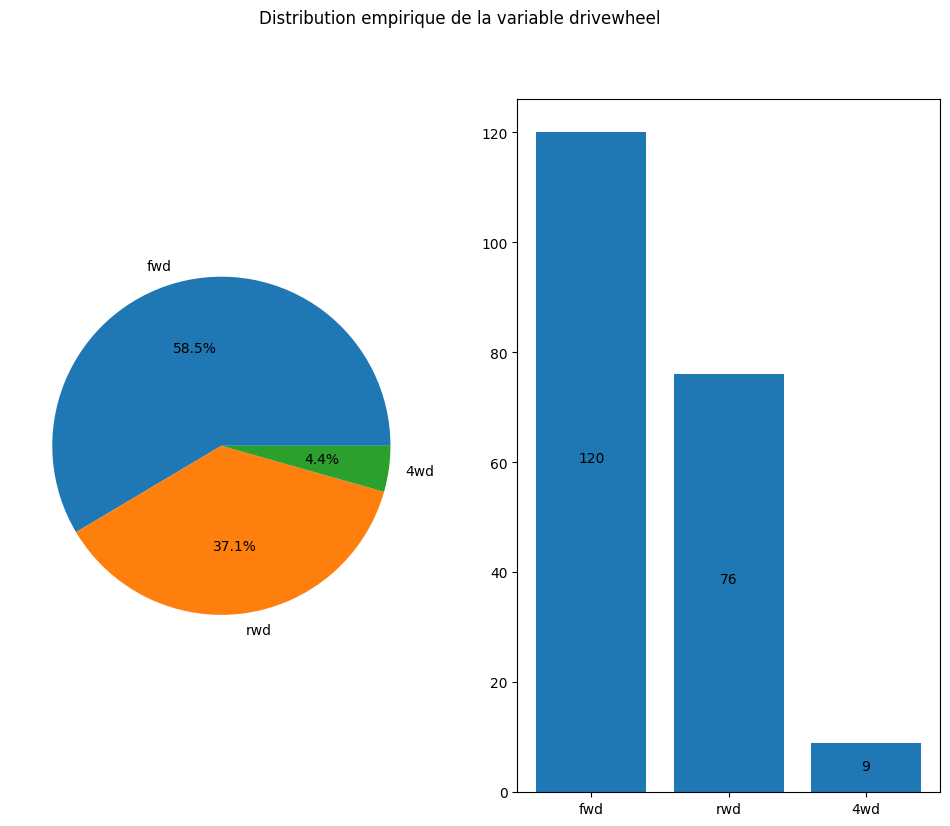

  drivewheel    n         f         F
0        fwd  120  0.585366  0.585366
1        rwd   76  0.370732  0.956098
2        4wd    9  0.043902  1.000000


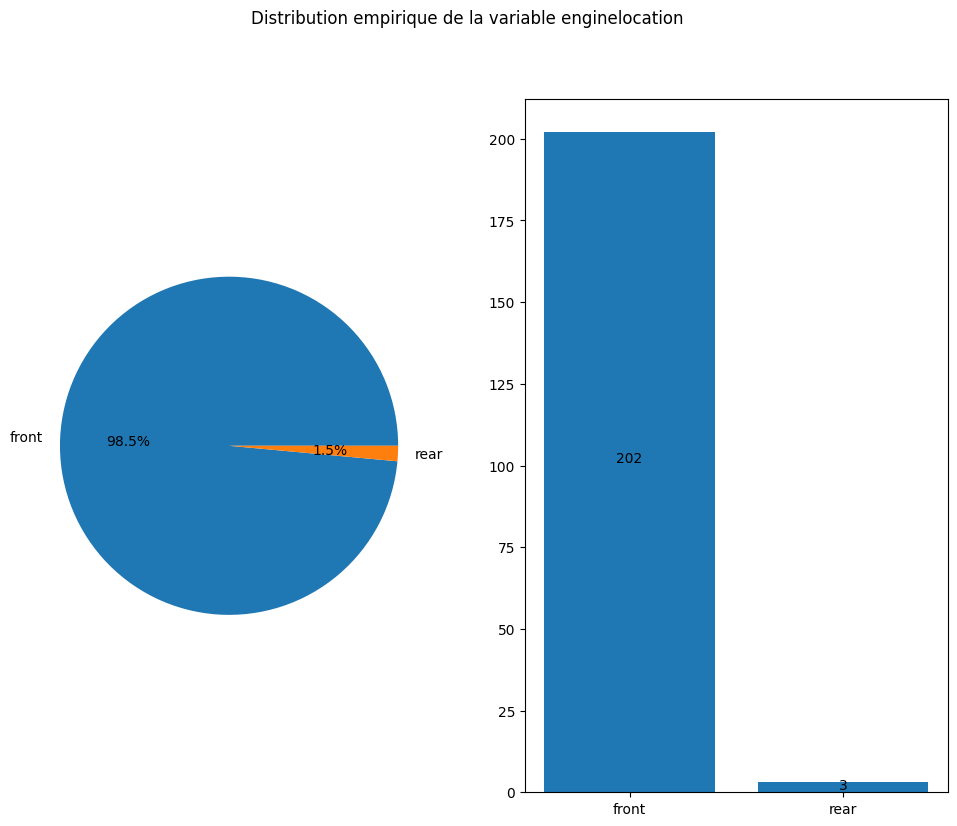

  enginelocation    n         f         F
0          front  202  0.985366  0.985366
1           rear    3  0.014634  1.000000


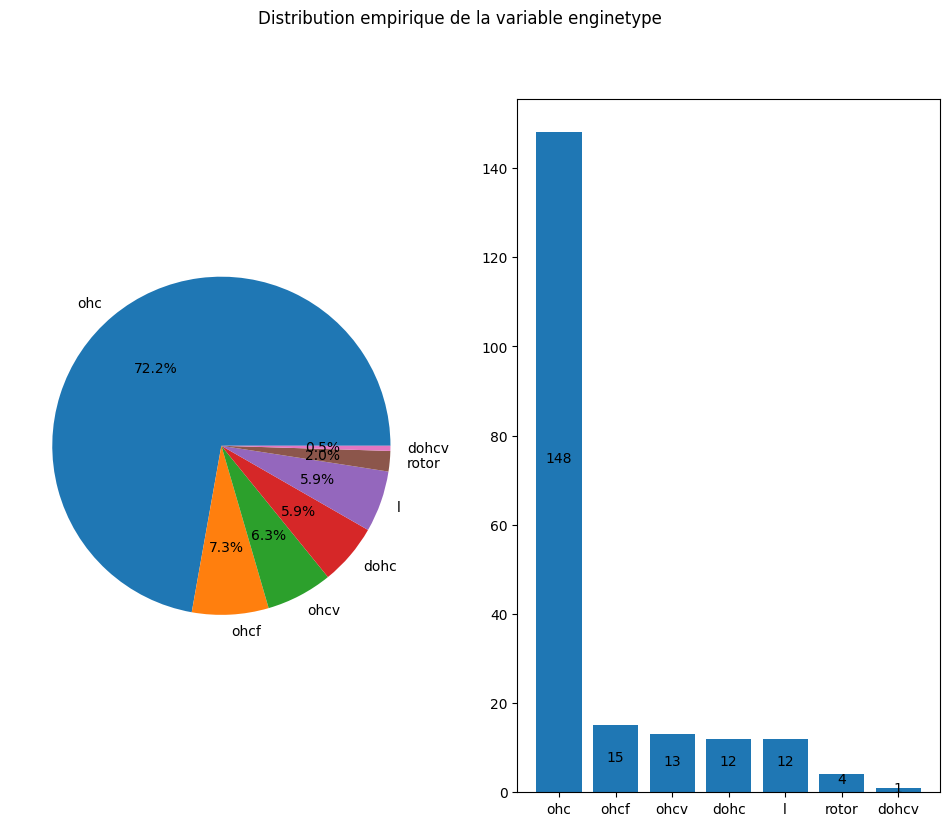

  enginetype    n         f         F
0        ohc  148  0.721951  0.721951
1       ohcf   15  0.073171  0.795122
2       ohcv   13  0.063415  0.858537
3       dohc   12  0.058537  0.917073
4          l   12  0.058537  0.975610
5      rotor    4  0.019512  0.995122
6      dohcv    1  0.004878  1.000000


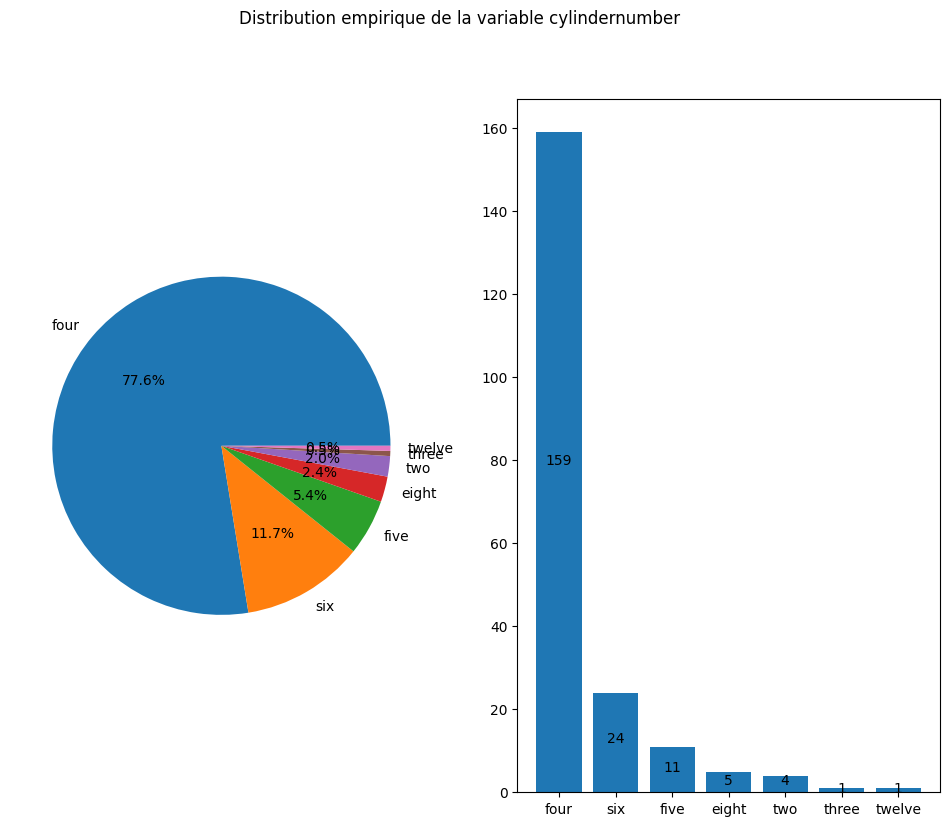

  cylindernumber    n         f         F
0           four  159  0.775610  0.775610
1            six   24  0.117073  0.892683
2           five   11  0.053659  0.946341
3          eight    5  0.024390  0.970732
4            two    4  0.019512  0.990244
5          three    1  0.004878  0.995122
6         twelve    1  0.004878  1.000000


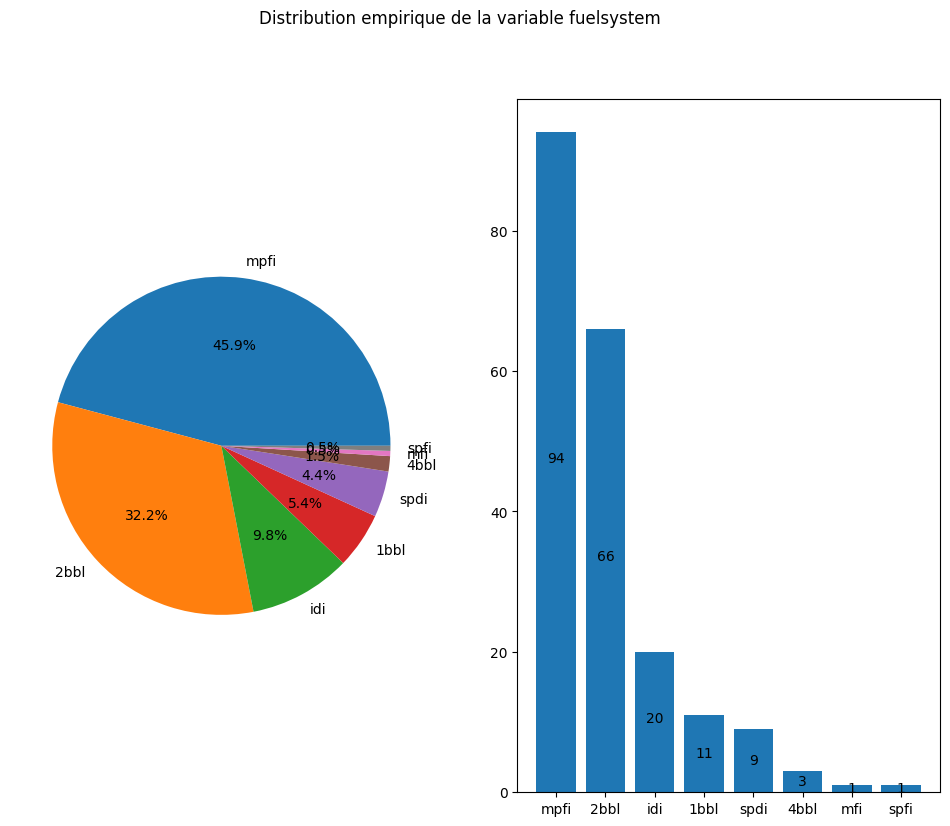

  fuelsystem   n         f         F
0       mpfi  94  0.458537  0.458537
1       2bbl  66  0.321951  0.780488
2        idi  20  0.097561  0.878049
3       1bbl  11  0.053659  0.931707
4       spdi   9  0.043902  0.975610
5       4bbl   3  0.014634  0.990244
6        mfi   1  0.004878  0.995122
7       spfi   1  0.004878  1.000000


In [14]:
for col in variable_qualitatives:
    # Pour des raisons de visibilité
    if col != "CarName":
        data.showDistributionVariableQualitative(col, show_table=True)        
    else: 
        data.showDistributionVariableQualitativeHorizontal(col, show_table=True, figsize=(10,35), limit_table=10)